In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
full = cv2.imread("hachi_2.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

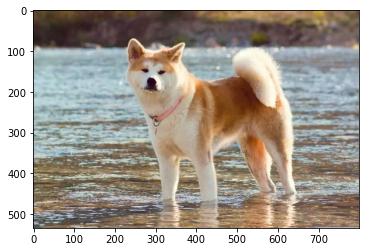

In [6]:
plt.imshow(full)

In [7]:
face = cv2.imread("hachi_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

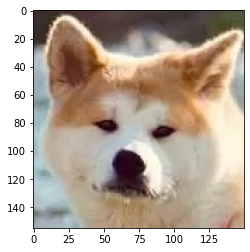

In [8]:
plt.imshow(face)

In [15]:
methods = ["cv2.TM_CCOEFF", "cv2.TM_CCOEFF_NORMED", "cv2.TM_CCORR_NORMED", "cv2.TM_CCORR", "cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED"]


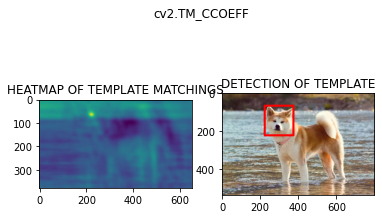

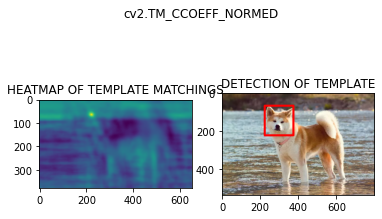

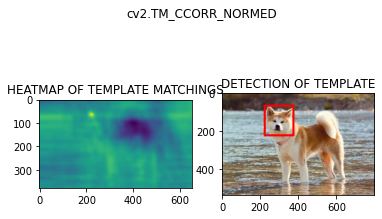

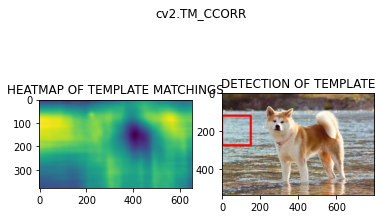

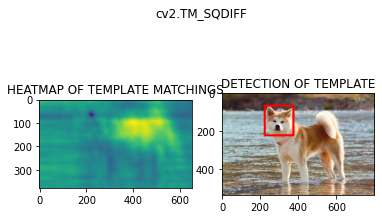

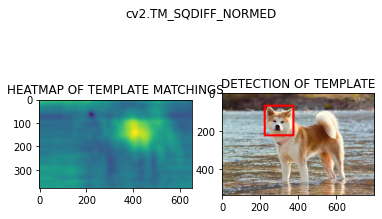

In [18]:
for m in methods:
    method = eval(m)
    
    full_copy = full.copy()
    
    # TEMPLATE MATCHINGS
    res = cv2.matchTemplate(full, face, method)
    
    # grabbing the min and max values of the heat map
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1]+ height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    # PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title("HEATMAP OF TEMPLATE MATCHINGS")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("DETECTION OF TEMPLATE")
    
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    
    plt.show()
    
    print("\n")
    print("\n")


In [9]:
method = eval("cv2.TM_CCOEFF")
res = cv2.matchTemplate(full, face, method=method)


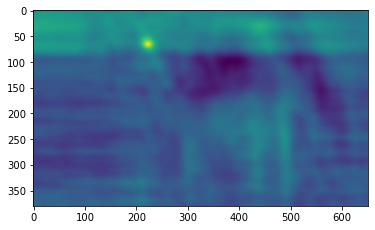

In [10]:
plt.imshow(res)